<a href="https://colab.research.google.com/github/ShubhamHaran/snippets/blob/master/Winer_and_bitwsie_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import os
import numpy.fft
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
image1 = cv2.imread('/content/pastaimg2.jpg')
gauss=cv2.GaussianBlur(image1,(7,7),0)
unsharp_image = cv2.addWeighted(image1, 2, gauss, -1, 0)
#cv2_imshow(unsharp_image)

In [0]:
img2=cv2.imread("/content/smoke.png")
rows,cols,channels = img2.shape
roi = image1[0:rows, 0:cols ]
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

ret, mask = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY_INV)

mask_inv = cv2.bitwise_not(mask)
img1_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)

#cv2_imshow(img1_bg)

In [0]:
#cv2_imshow(mask)

In [0]:
#cv2_imshow(img2gray)

In [0]:
#cv2_imshow(img1_bg)

In [0]:
img2_fg=cv2.bitwise_and(img2,img2,mask=mask)
#cv2_imshow(img2_fg)

In [0]:
out_img = cv2.add(img1_bg,img2_fg)

image1[0:rows, 0:cols ] = out_img
#cv2_imshow(out_img)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd3d5d06a90>,
 <matplotlib.image.AxesImage at 0x7fd3d5fe87f0>)

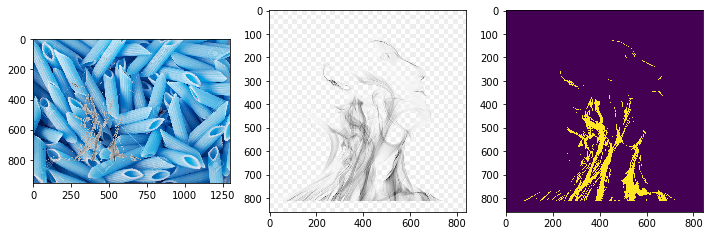

In [128]:
fig = plt.figure(figsize=(12, 10))
fig.add_subplot(1,3,1),plt.imshow(image1)
fig.add_subplot(1,3,2),plt.imshow(img2)
fig.add_subplot(1,3,3),plt.imshow(mask)



(<matplotlib.axes._subplots.AxesSubplot at 0x7fd3d7c560b8>,
 Text(0.5, 1.0, 'Mask Foreground'))

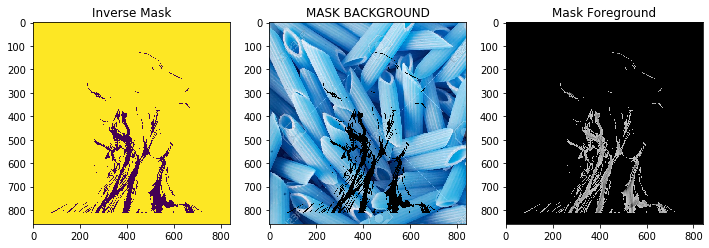

In [129]:
fig = plt.figure(figsize=(12, 10))
fig.add_subplot(2,3,1),plt.imshow(mask_inv),plt.title("Inverse Mask")
fig.add_subplot(2,3,2),plt.imshow(img1_bg),plt.title("MASK BACKGROUND")
fig.add_subplot(2,3,3),plt.imshow(img2_fg),plt.title("Mask Foreground")

In [0]:
from numpy.fft import fft2, ifft2

from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt
def blur(img, kernel_size = 3):
  dummy = np.copy(img)
  h = np.eye(kernel_size) / kernel_size
  dummy = convolve2d(dummy, h, mode = 'valid')
  return dummy
def add_gaussian_noise(img, sigma):
  gauss = np.random.normal(0, sigma, np.shape(img))
  noisy_img = img + gauss
  noisy_img[noisy_img < 0] = 0
  noisy_img[noisy_img > 255] = 255
  return noisy_img
def wiener_filter(img, kernel, K):
  kernel /= np.sum(kernel)
  dummy = np.copy(img)
  dummy = fft2(dummy)
  kernel = fft2(kernel, s = img.shape)
  kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
  dummy = dummy * kernel
  dummy = np.abs(ifft2(dummy))
  return dummy
def gaussian_kernel(kernel_size = 3):
  h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
  h = np.dot(h, h.transpose())
  h /= np.sum(h)
  return h


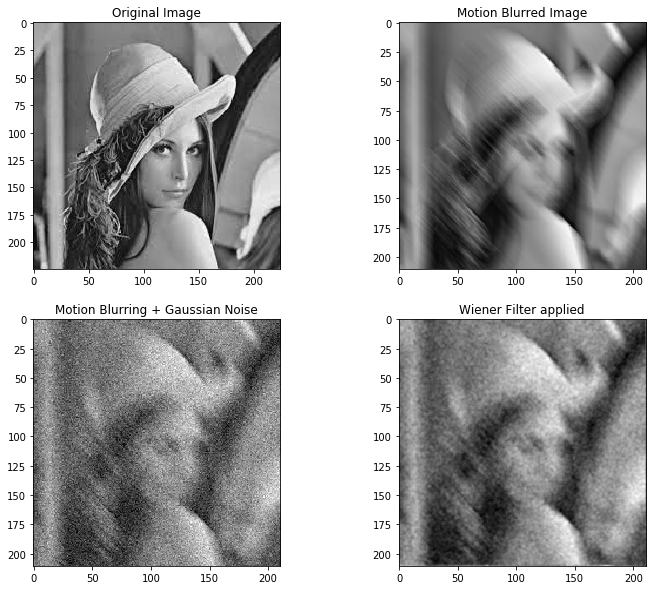

In [131]:
def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
if __name__ == '__main__':
  file_name = os.path.join('/content/lena_rgb.jpeg')
  img = rgb2gray(plt.imread(file_name))
  blurred_img = blur(img, kernel_size = 15)
  noisy_img = add_gaussian_noise(blurred_img, sigma = 20)
  kernel = gaussian_kernel(3)
  filtered_img = wiener_filter(noisy_img, kernel, K = 10)
  display = [img, blurred_img, noisy_img, filtered_img]
  label = ['Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise', 'Wiener Filter applied']
  fig = plt.figure(figsize=(12, 10))
  for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
  plt.show()

In [132]:
image2=cv2.imread("/content/denoising.png")
dft = cv2.dft(np.float32(image2),flags=cv2.DFT_COMPLEX_OUTPUT)
# shift the zero-frequncy component to the center of the spectrum
dft_shft= np.fft.fftshift(dft)
rows, cols = image2.shapecrow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] =1
# apply mask and inverse DFT
fshift = dft_shft*maskf_ishift
fshift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

error: ignored

In [0]:
plt.figure(figsize=(11,6))plt.subplot(121),
plt.imshow(image2, cmap = 'gray')plt.title('Input Image’),
plt.xticks([]), plt.yticks([])plt.subplot(122),
plt.imshow(img_back, cmap = 'gray’)
plt.title('Low PassFilter'), plt.xticks([]), plt.yticks([])plt.show()